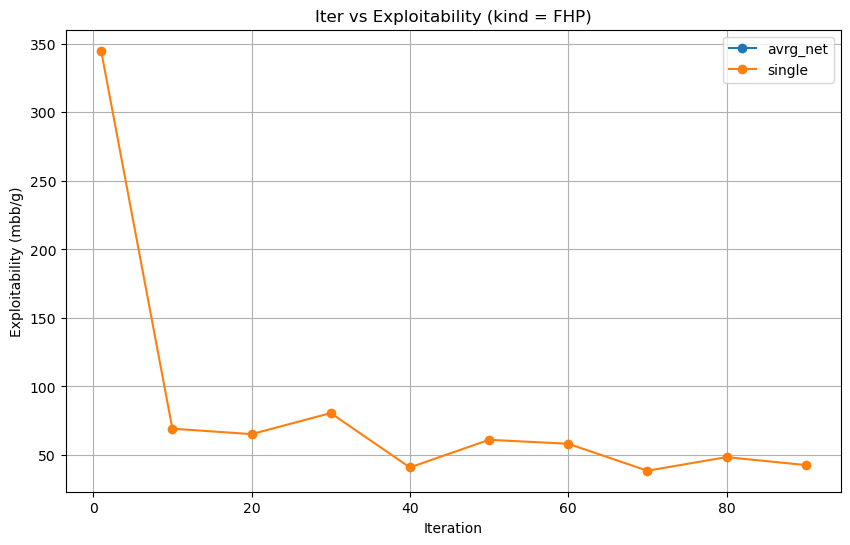

In [2]:
import matplotlib.pyplot as plt
import re

modes = ["avrg_net", "single"]
game_cls = "fhp"
skip_init = False

iters = {}
exploitabilities = {}

for mode in modes:
	iters[mode] = []
	exploitabilities[mode] = []
	file_path = f"../assets/exploitability/{mode}.txt"

	with open(file_path, "r") as file:
		for idx, line in enumerate(file):
			if skip_init and not idx: continue 
			match = re.search(r"iter\s*=\s*(\d+).*?exploitability\s*=\s*([\d.]+)", line)
			if match:
				iters[mode].append(int(match.group(1)))
				exploitabilities[mode].append(float(match.group(2)))

plt.figure(figsize=(10, 6))
for mode in modes:
	plt.plot(iters[mode], exploitabilities[mode], marker='o', linestyle='-', label=mode)
plt.title(f"Iter vs Exploitability (kind = {game_cls.upper()})")
plt.xlabel("Iteration")
plt.ylabel("Exploitability (mbb/g)")
plt.grid(True)
plt.legend()
plt.savefig('../assets/big_leduc_exploitability.jpg')
plt.show()